In [440]:
#https://gitlab.com/dword4/nhlapi/-/blob/master/stats-api.md

In [441]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [442]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [443]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [444]:
import requests

link = 'https://statsapi.web.nhl.com/api/v1/teams'
f = requests.get(link)
#print(f.text)

In [445]:
import requests

link = 'https://statsapi.web.nhl.com/api/v1/people/8471215/stats?stats=statsSingleSeason&season=20232024'
f = requests.get(link)
#print(f.text)

In [446]:
import requests

link = 'https://statsapi.web.nhl.com/api/v1/people/8471215/stats?stats=gameLog&season=20232024'
f = requests.get(link)
#print(f.text)

In [447]:
#  "id" : 8471215,
#       "fullName" : "Evgeni Malkin",
#       "link" : "/api/v1/people/8471215"

In [448]:
import requests

link = 'https://statsapi.web.nhl.com/api/v1/teams/'
f = requests.get(link)
#print(f.text)
df=pd.DataFrame(f.json()['teams'])
df=df[['name','link']]
df['Teamid']=df['link'].str[-2:].str.replace('/','')
df['TeamName']=df['name']
Teams=df[['TeamName','Teamid']]
Teams

,TeamName,Teamid
0,New Jersey Devils,1
1,New York Islanders,2
2,New York Rangers,3
3,Philadelphia Flyers,4
4,Pittsburgh Penguins,5
5,Boston Bruins,6
6,Buffalo Sabres,7
7,Montréal Canadiens,8
8,Ottawa Senators,9
9,Toronto Maple Leafs,10


In [449]:

idlist = Teams['Teamid'].tolist()
#teamnamelist = Teams['TeamName'].tolist()
NHLRoster=pd.DataFrame()
links=[]
names=[]
teamid=[]
#df=pd.DataFrame(f.json()['roster'][0])
#df
for j in idlist:
    link = 'https://statsapi.web.nhl.com/api/v1/teams/'+j+'/roster'
    f = requests.get(link)

    for i in range(0,40):
        try:
            #print(f.json()['roster'][i]['person']['link'])
            links.append(f.json()['roster'][i]['person']['link'])
            teamid.append(j)
            #print(f.json()['roster'][i]['person']['fullName'])
            names.append(f.json()['roster'][i]['person']['fullName'])
        except:
            #print('break')
            break


NHLRoster['Teamid']=teamid
NHLRoster['Teamid']=NHLRoster['Teamid']
NHLRoster = pd.merge(NHLRoster, Teams[['TeamName','Teamid']], on='Teamid', how='left')
NHLRoster['Names']=names
NHLRoster['Link']=links
NHLRoster['Playerid'] = NHLRoster['Link'].str[-7:]
NHLRoster['Playerid'] = NHLRoster['Playerid']
NHLRoster
#df=pd.DataFrame(f.json()['roster'])
# for i in range(0,df.shape[0]+1):
#     df[i].iat[2,0]
#print(f.text)
# print(jason)
#df.shape[0]
#df
#w.iat[2,0]


,Teamid,TeamName,Names,Link,Playerid
0,1,New Jersey Devils,Brendan Smith,/api/v1/people/8474090,8474090
1,1,New Jersey Devils,Erik Haula,/api/v1/people/8475287,8475287
2,1,New Jersey Devils,Tyler Toffoli,/api/v1/people/8475726,8475726
3,1,New Jersey Devils,Ondrej Palat,/api/v1/people/8476292,8476292
4,1,New Jersey Devils,Dougie Hamilton,/api/v1/people/8476462,8476462
...,...,...,...,...,...
737,55,Seattle Kraken,Joey Daccord,/api/v1/people/8478916,8478916
738,55,Seattle Kraken,Kailer Yamamoto,/api/v1/people/8479977,8479977
739,55,Seattle Kraken,Eeli Tolvanen,/api/v1/people/8480009,8480009
740,55,Seattle Kraken,Tye Kartye,/api/v1/people/8481789,8481789


In [450]:
NHLRoster[NHLRoster['Playerid']=='8477424']

,Teamid,TeamName,Names,Link,Playerid
379,18,Nashville Predators,Juuse Saros,/api/v1/people/8477424,8477424


In [451]:
link = 'https://statsapi.web.nhl.com/api/v1/people/8477424/stats?stats=gameLog&season=20232024'
f = requests.get(link)
#print(f.json()['stats'][0]['splits'])
#            goals.append(f.json()['stats'][0]['splits'][i]['stat']['goals'])

pd.DataFrame(f.json()['stats'][0]['splits'][2])


,season,stat,team,opponent,date,isHome,isWin,isOT,game
timeOnIce,20232024,18:52,NaN,NaN,2023-10-17,True,False,False,NaN
ot,20232024,0,NaN,NaN,2023-10-17,True,False,False,NaN
shutouts,20232024,0,NaN,NaN,2023-10-17,True,False,False,NaN
saves,20232024,7,NaN,NaN,2023-10-17,True,False,False,NaN
powerPlaySaves,20232024,1,NaN,NaN,2023-10-17,True,False,False,NaN
shortHandedSaves,20232024,0,NaN,NaN,2023-10-17,True,False,False,NaN
evenSaves,20232024,6,NaN,NaN,2023-10-17,True,False,False,NaN
shortHandedShots,20232024,0,NaN,NaN,2023-10-17,True,False,False,NaN
evenShots,20232024,9,NaN,NaN,2023-10-17,True,False,False,NaN
powerPlayShots,20232024,2,NaN,NaN,2023-10-17,True,False,False,NaN


In [452]:
import requests
NHLRoster
Playeridlist = NHLRoster['Playerid'].tolist()

playerStats=pd.DataFrame()
opponent=[]
date=[]
points=[]
goals=[]
assists=[]
shots=[]
blocked=[]
playerid=[]

for j in Playeridlist:
    link = 'https://statsapi.web.nhl.com/api/v1/people/'+j+'/stats?stats=gameLog&season=20232024'
    f = requests.get(link)
    #print(f.text)
    # df=pd.DataFrame(f.json()['stats'][0]['splits'])
    # df=pd.DataFrame(f.json()['stats'][0]['splits'][3])
    for i in range(0,85):
        try:
            
            points.append(f.json()['stats'][0]['splits'][i]['stat']['points'])
            goals.append(f.json()['stats'][0]['splits'][i]['stat']['goals'])
            assists.append(f.json()['stats'][0]['splits'][i]['stat']['assists'])
            shots.append(f.json()['stats'][0]['splits'][i]['stat']['shots'])
            blocked.append(f.json()['stats'][0]['splits'][i]['stat']['blocked'])
            opponent.append(f.json()['stats'][0]['splits'][i]['opponent']['name'])
            date.append(f.json()['stats'][0]['splits'][i]['date'])
            playerid.append(j)
            #print(f.json()['stats'][0]['splits'][3]['stat']['assists'])
            #print(f.json()['stats'][0]['splits'][3]['stat']['shots'])
            #print(f.json()['stats'][0]['splits'][3]['stat']['goals'])
            #print(f.json()['stats'][0]['splits'][3]['stat']['blocked'])
            #print(f.json()['stats'][0]['splits'][3]['stat']['points'])
            #print(f.json()['stats'][0]['splits'][3]['date'])
            #print(f.json()['stats'][0]['splits'][3]['opponent']['name'])
        except:
            #print('break')
            break

#playerStats['Teamid']=teamid
playerStats['Playerid']=playerid
playerStats['Opponent']=opponent
playerStats['Date']=date
playerStats['Date']=pd.to_datetime(playerStats['Date'])
playerStats['Points']=points
playerStats['Goals']=goals
playerStats['Assists']=assists
playerStats['Shots']=shots
playerStats['Blocked']=blocked

playerStats = pd.merge(playerStats, NHLRoster[['Playerid','Names','Teamid','TeamName']], on='Playerid', how='left')
playerStats['GameNumber'] = playerStats.groupby(['Teamid','Names'])['Date'].cumcount(ascending=False)+1
playerStats['GP']=playerStats.groupby('TeamName').GameNumber.transform(np.max)
playerStats

/var/folders/mk/mqpynx7956n6hbt913946r2m0000gn/T/ipykernel_5589/4274159715.py:56: FutureWarning: The provided callable <function max at 0x10d5f7310> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  playerStats['MAXGameNumber']=playerStats.groupby('TeamName').GameNumber.transform(np.max)


,Playerid,Opponent,Date,Points,Goals,Assists,Shots,Blocked,Names,Teamid,TeamName,GameNumber,MAXGameNumber
0,8474090,New York Islanders,2023-10-20,0,0,0,2,1,Brendan Smith,1,New Jersey Devils,4,4
1,8474090,Florida Panthers,2023-10-16,0,0,0,0,0,Brendan Smith,1,New Jersey Devils,3,4
2,8474090,Arizona Coyotes,2023-10-13,0,0,0,5,1,Brendan Smith,1,New Jersey Devils,2,4
3,8474090,Detroit Red Wings,2023-10-12,0,0,0,0,1,Brendan Smith,1,New Jersey Devils,1,4
4,8475287,Florida Panthers,2023-10-16,2,1,1,6,0,Erik Haula,1,New Jersey Devils,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2811,8482665,Carolina Hurricanes,2023-10-19,1,0,1,1,0,Matty Beniers,55,Seattle Kraken,5,6
2812,8482665,Colorado Avalanche,2023-10-17,0,0,0,2,0,Matty Beniers,55,Seattle Kraken,4,6
2813,8482665,St. Louis Blues,2023-10-14,0,0,0,2,0,Matty Beniers,55,Seattle Kraken,3,6
2814,8482665,Nashville Predators,2023-10-12,0,0,0,0,0,Matty Beniers,55,Seattle Kraken,2,6


In [552]:
import numpy as np
#playerStats

OpponentStats=pd.DataFrame()

OpponentStats['Opponent']=playerStats['Opponent']

OpponentStats['PointsAgainst']=playerStats.groupby('Opponent').Points.transform(np.sum)
OpponentStats['GoalsAgainst']=playerStats.groupby('Opponent').Goals.transform(np.sum)
OpponentStats['AssistsAgainst']=playerStats.groupby('Opponent').Assists.transform(np.sum)
OpponentStats['ShotsAgainst']=playerStats.groupby('Opponent').Shots.transform(np.sum)
OpponentStats['BlockedAgainst']=playerStats.groupby('Opponent').Blocked.transform(np.sum)

OpponentStats=OpponentStats.merge(playerStats[['TeamName','GP']],left_on='Opponent',right_on='TeamName',how='left')

OpponentStats=OpponentStats.drop(columns=['TeamName']).drop_duplicates().reset_index(drop=True)

OpponentStats['AvgPointsAgainst']=OpponentStats['PointsAgainst']/OpponentStats['GP']
OpponentStats['AvgGoalsAgainst']=OpponentStats['GoalsAgainst']/OpponentStats['GP']
OpponentStats['AvgAssistsAgainst']=OpponentStats['AssistsAgainst']/OpponentStats['GP']
OpponentStats['AvgShotsAgainst']=OpponentStats['ShotsAgainst']/OpponentStats['GP']
OpponentStats['AvgBlockedAgainst']=OpponentStats['BlockedAgainst']/OpponentStats['GP']
OpponentStats['GoalsPerShot']=OpponentStats['GoalsAgainst']/OpponentStats['ShotsAgainst']

#OpponentStats=OpponentStats.drop_duplicates()#.reset_index(drop=True)
OpponentStats['GoalsPerShotRank']=OpponentStats['GoalsPerShot'].rank()

OpponentStats['PointsAgainstRank']=OpponentStats['AvgPointsAgainst'].rank()
OpponentStats['GoalsAgainstRank']=OpponentStats['AvgGoalsAgainst'].rank()
OpponentStats['AssistsAgainstRank']=OpponentStats['AvgAssistsAgainst'].rank()
OpponentStats['ShotsAgainstRank']=OpponentStats['AvgShotsAgainst'].rank()
OpponentStats['BlockedAgainstRank']=OpponentStats['AvgBlockedAgainst'].rank()

OpponentStats=OpponentStats[['Opponent', 'GP','GoalsPerShotRank', 'GoalsPerShot','ShotsAgainstRank', 'ShotsAgainst',
       'PointsAgainstRank', 'PointsAgainst', 'GoalsAgainstRank', 'GoalsAgainst', 'AssistsAgainstRank', 'AssistsAgainst',
       'BlockedAgainstRank','BlockedAgainst', 
       'AvgPointsAgainst','AvgGoalsAgainst', 'AvgAssistsAgainst', 'AvgShotsAgainst','AvgBlockedAgainst']]

OpponentStats.sort_values(by=['ShotsAgainstRank']).reset_index(drop=True)

/var/folders/mk/mqpynx7956n6hbt913946r2m0000gn/T/ipykernel_5589/474410052.py:8: FutureWarning: The provided callable <function sum at 0x10d5f3ca0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  OpponentStats['PointsAgainst']=playerStats.groupby('Opponent').Points.transform(np.sum)
/var/folders/mk/mqpynx7956n6hbt913946r2m0000gn/T/ipykernel_5589/474410052.py:9: FutureWarning: The provided callable <function sum at 0x10d5f3ca0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  OpponentStats['GoalsAgainst']=playerStats.groupby('Opponent').Goals.transform(np.sum)
/var/folders/mk/mqpynx7956n6hbt913946r2m0000gn/T/ipykernel_5589/474410052.py:10: FutureWarning: The provided callable <function sum at 0x10d5f3ca0> is currently using SeriesGroupBy.sum. In

,Opponent,MAXGameNumber,GoalsPerShotRank,GoalsPerShot,ShotsAgainstRank,ShotsAgainst,PointsAgainstRank,PointsAgainst,GoalsAgainstRank,GoalsAgainst,AssistsAgainstRank,AssistsAgainst,BlockedAgainstRank,BlockedAgainst,AvgPointsAgainst,AvgGoalsAgainst,AvgAssistsAgainst,AvgShotsAgainst,AvgBlockedAgainst
0,New York Rangers,5,16.0,0.100840,1.0,119,7.0,33,6.0,12,8.0,21,20.0,83,6.600000,2.400000,4.200000,23.800000,16.600000
1,Ottawa Senators,5,24.0,0.111940,2.0,134,16.0,42,15.5,15,17.0,27,5.0,71,8.400000,3.000000,5.400000,26.800000,14.200000
2,Carolina Hurricanes,6,32.0,0.182927,3.0,164,32.0,77,32.0,30,32.0,47,32.0,119,12.833333,5.000000,7.833333,27.333333,19.833333
3,Philadelphia Flyers,5,14.0,0.094891,4.0,137,8.5,34,10.0,13,8.0,21,11.0,74,6.800000,2.600000,4.200000,27.400000,14.800000
4,Pittsburgh Penguins,5,20.0,0.107914,5.5,139,20.0,44,15.5,15,22.0,29,23.5,84,8.800000,3.000000,5.800000,27.800000,16.800000
5,Los Angeles Kings,5,28.0,0.129496,5.5,139,24.0,48,24.0,18,25.0,30,20.0,83,9.600000,3.600000,6.000000,27.800000,16.600000
6,Vegas Golden Knights,6,4.0,0.065868,7.0,167,3.0,29,4.0,11,3.0,18,28.0,109,4.833333,1.833333,3.000000,27.833333,18.166667
7,Colorado Avalanche,5,2.0,0.057143,8.0,140,1.0,21,2.0,8,1.0,13,14.0,78,4.200000,1.600000,2.600000,28.000000,15.600000
8,Toronto Maple Leafs,5,29.0,0.131944,10.0,144,25.0,49,26.5,19,25.0,30,29.0,94,9.800000,3.800000,6.000000,28.800000,18.800000
9,Detroit Red Wings,5,10.0,0.090278,10.0,144,12.0,36,10.0,13,13.0,23,1.0,51,7.200000,2.600000,4.600000,28.800000,10.200000


In [546]:
OpponentStats.columns

Index(['Opponent', 'PointsAgainst', 'GoalsAgainst', 'AssistsAgainst',
       'ShotsAgainst', 'BlockedAgainst', 'MAXGameNumber', 'AvgPointsAgainst',
       'AvgGoalsAgainst', 'AvgAssistsAgainst', 'AvgShotsAgainst',
       'AvgBlockedAgainst', 'GoalsPerShot', 'GoalsPerShotRank',
       'PointsAgainstRank', 'GoalsAgainstRank', 'AssistsAgainstRank',
       'ShotsAgainstRank', 'BlockedAgainstRank'],
      dtype='object')

In [492]:
ExpandedStats=playerStats#[(playerStats['TeamName']=='Boston Bruins')]#|(playerStats['TeamName']=='Anaheim Ducks')]
ExpandedStats=ExpandedStats[['TeamName','Names','Points','Goals','Assists','Shots','Blocked','Opponent','Date','GameNumber','GP']]

ExpandedStats['TotalPoints']=ExpandedStats.groupby('Names').Points.transform(np.sum)
ExpandedStats['AvgPoints']=ExpandedStats['TotalPoints']/ExpandedStats['GP']
ExpandedStats['TotalGoals']=playerStats.groupby('Names').Goals.transform(np.sum)
ExpandedStats['AvgGoals']=ExpandedStats['TotalGoals']/ExpandedStats['GP']
ExpandedStats['TotalAssists']=ExpandedStats.groupby('Names').Assists.transform(np.sum)
ExpandedStats['AvgAssists']=ExpandedStats['TotalAssists']/ExpandedStats['GP']
ExpandedStats['TotalShots']=ExpandedStats.groupby('Names').Shots.transform(np.sum)
ExpandedStats['AvgShots']=ExpandedStats['TotalShots']/ExpandedStats['GP']
ExpandedStats['TotalBlocked']=ExpandedStats.groupby('Names').Blocked.transform(np.sum)
ExpandedStats['AvgBlocked']=ExpandedStats['TotalBlocked']/ExpandedStats['GP']

ExpandedStats=ExpandedStats.drop_duplicates()

ExpandedStats.sort_values(by=['AvgPoints','Names'], ascending=False).reset_index(drop=True).head(20)

/var/folders/mk/mqpynx7956n6hbt913946r2m0000gn/T/ipykernel_5589/1372759524.py:4: FutureWarning: The provided callable <function sum at 0x10d5f3ca0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ExpandedStats['TotalPoints']=ExpandedStats.groupby('Names').Points.transform(np.sum)
/var/folders/mk/mqpynx7956n6hbt913946r2m0000gn/T/ipykernel_5589/1372759524.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ExpandedStats['TotalPoints']=ExpandedStats.groupby('Names').Points.transform(np.sum)
/var/folders/mk/mqpynx7956n6hbt913946r2m0000gn/T/ipykernel_5589/1372759524.py:6: FutureWarning: The provided callable <function sum at 0x10

,TeamName,Names,Points,Goals,Assists,Shots,Blocked,Opponent,Date,GameNumber,...,TotalPoints,AvgPoints,TotalGoals,AvgGoals,TotalAssists,AvgAssists,TotalShots,AvgShots,TotalBlocked,AvgBlocked
0,New Jersey Devils,Jack Hughes,4,2,2,6,0,New York Islanders,2023-10-20,4,...,10,2.5,4,1.00,6,1.50,22,5.50,0,0.0
1,New Jersey Devils,Jack Hughes,1,0,1,6,0,Florida Panthers,2023-10-16,3,...,10,2.5,4,1.00,6,1.50,22,5.50,0,0.0
2,New Jersey Devils,Jack Hughes,3,0,3,6,0,Arizona Coyotes,2023-10-13,2,...,10,2.5,4,1.00,6,1.50,22,5.50,0,0.0
3,New Jersey Devils,Jack Hughes,2,2,0,4,0,Detroit Red Wings,2023-10-12,1,...,10,2.5,4,1.00,6,1.50,22,5.50,0,0.0
4,New Jersey Devils,Jesper Bratt,3,0,3,1,0,New York Islanders,2023-10-20,4,...,8,2.0,3,0.75,5,1.25,10,2.50,2,0.5
5,New Jersey Devils,Jesper Bratt,2,1,1,5,1,Florida Panthers,2023-10-16,3,...,8,2.0,3,0.75,5,1.25,10,2.50,2,0.5
6,New Jersey Devils,Jesper Bratt,3,2,1,3,0,Arizona Coyotes,2023-10-13,2,...,8,2.0,3,0.75,5,1.25,10,2.50,2,0.5
7,New Jersey Devils,Jesper Bratt,0,0,0,1,1,Detroit Red Wings,2023-10-12,1,...,8,2.0,3,0.75,5,1.25,10,2.50,2,0.5
8,Vancouver Canucks,Elias Pettersson,2,1,1,2,1,Florida Panthers,2023-10-21,5,...,10,2.0,2,0.40,8,1.60,12,2.40,3,0.6
9,Vancouver Canucks,Elias Pettersson,2,0,2,3,0,Tampa Bay Lightning,2023-10-19,4,...,10,2.0,2,0.40,8,1.60,12,2.40,3,0.6


In [504]:

AvgStats=ExpandedStats[['Names','TeamName','GP','AvgPoints','AvgGoals','AvgAssists','AvgShots','AvgBlocked']].drop_duplicates()

AvgStats[(AvgStats['TeamName']=='Boston Bruins')
         |(AvgStats['TeamName']=='Anaheim Ducks')].sort_values(by=['AvgShots'], ascending=False).reset_index(drop=True).head(20)

,Names,TeamName,MAXGameNumber,AvgPoints,AvgGoals,AvgAssists,AvgShots,AvgBlocked
0,David Pastrnak,Boston Bruins,4,2.00,1.25,0.75,4.75,0.00
1,Brad Marchand,Boston Bruins,4,1.50,0.75,0.75,3.25,1.00
2,James van Riemsdyk,Boston Bruins,4,1.00,0.75,0.25,1.75,0.25
3,Frank Vatrano,Anaheim Ducks,4,1.00,1.00,0.00,3.50,2.00
4,Mason McTavish,Anaheim Ducks,4,0.75,0.25,0.50,2.25,0.50
5,Troy Terry,Anaheim Ducks,4,0.75,0.25,0.50,3.50,0.25
6,Ryan Strome,Anaheim Ducks,4,0.75,0.00,0.75,1.50,1.00
7,Charlie McAvoy,Boston Bruins,4,0.50,0.00,0.50,2.00,2.50
8,Pavel Mintyukov,Anaheim Ducks,4,0.50,0.25,0.25,1.75,1.25
9,Jamie Drysdale,Anaheim Ducks,4,0.50,0.00,0.50,0.75,0.25


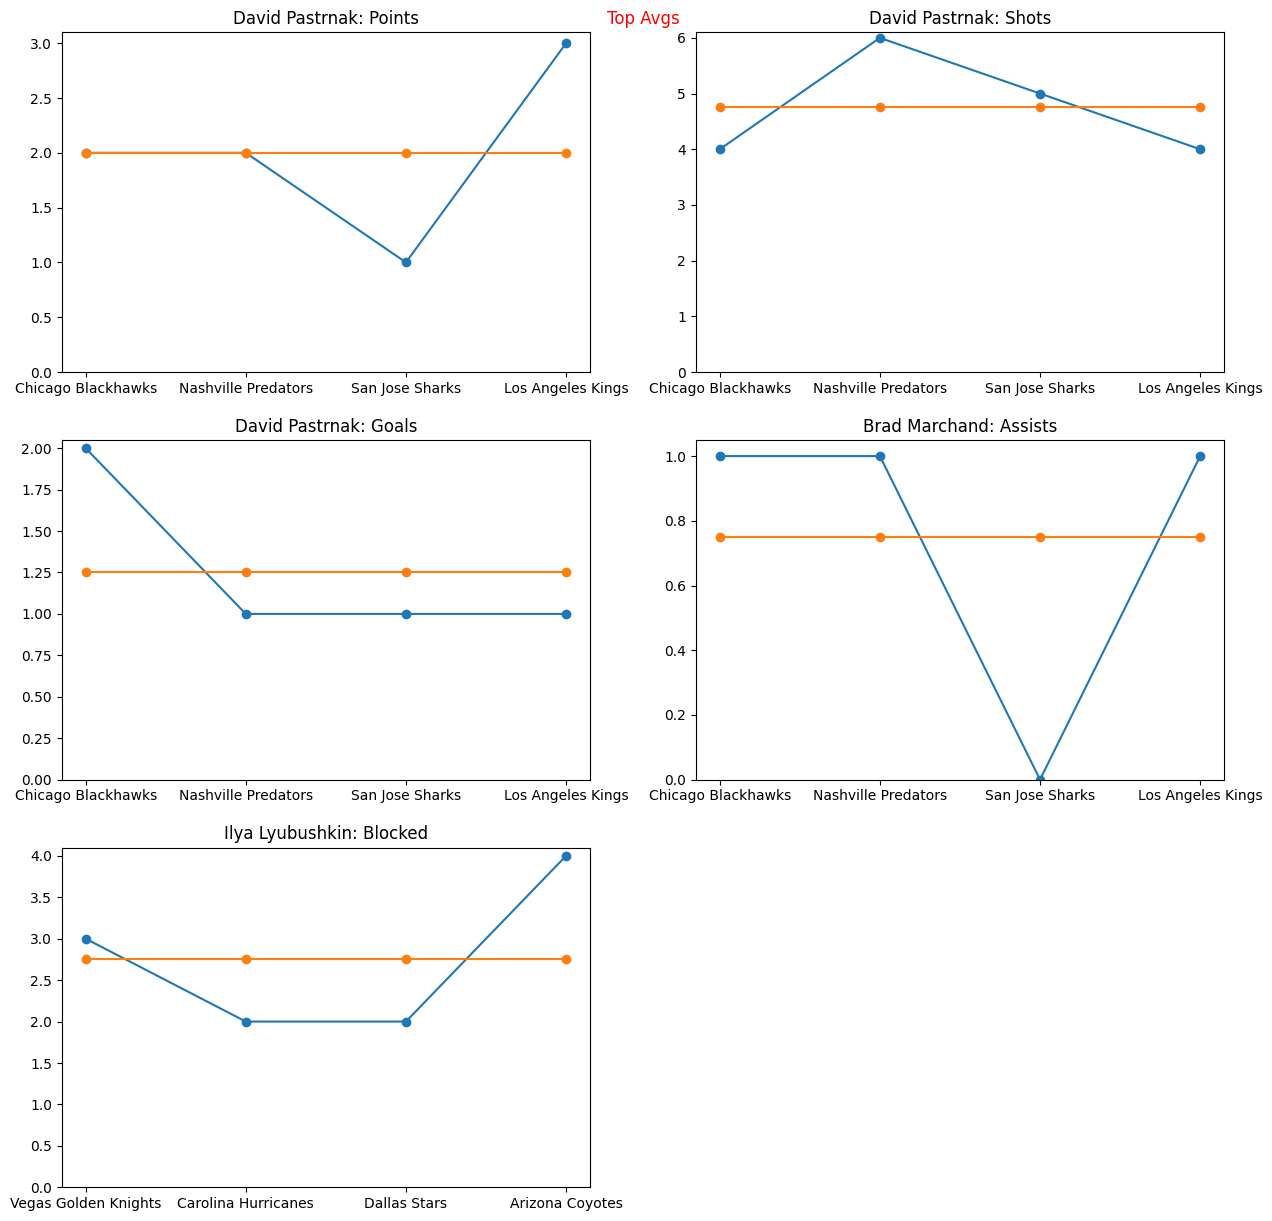

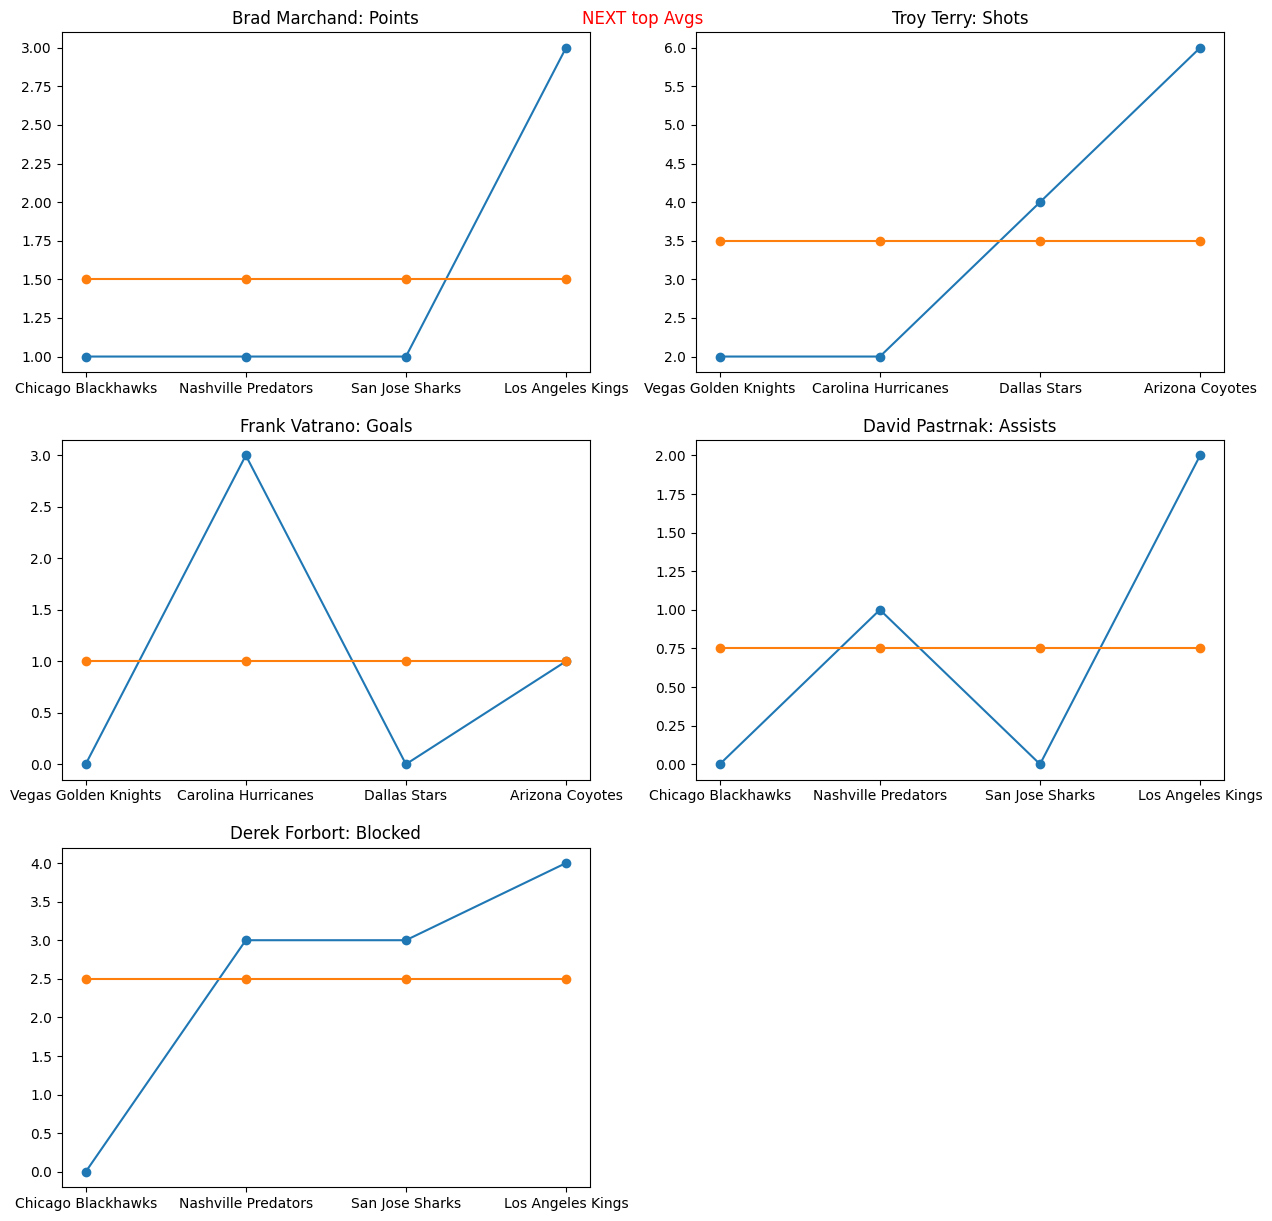

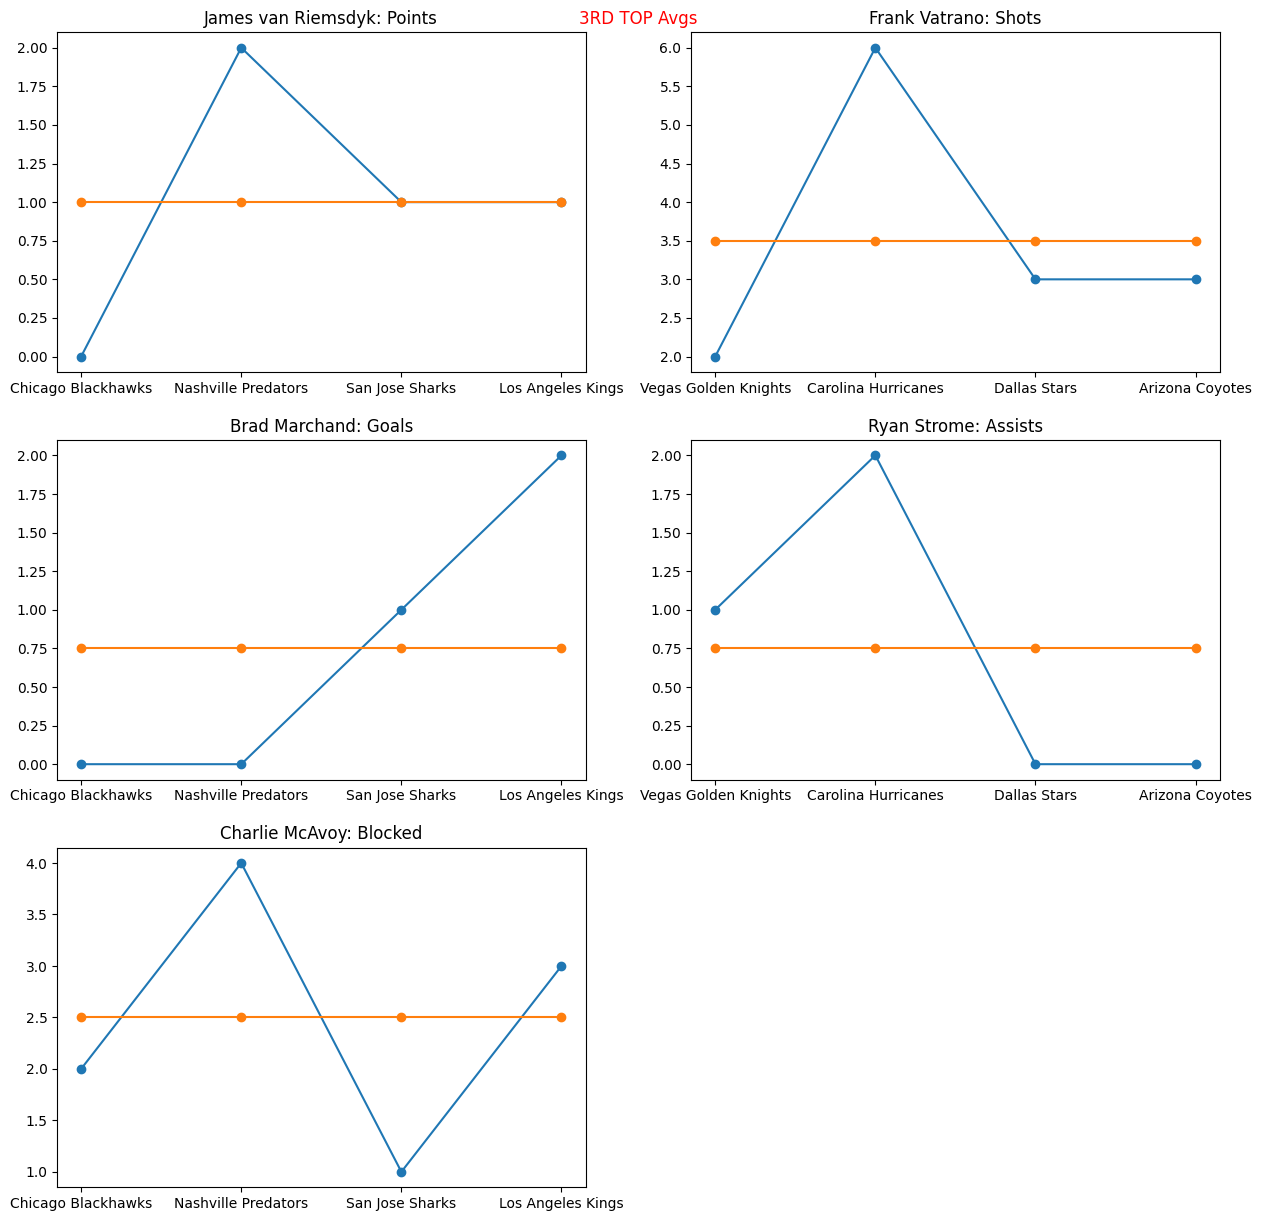

,Opponent,MAXGameNumber,AvgPointsAgainst,AvgGoalsAgainst,AvgAssistsAgainst,AvgShotsAgainst,GoalsPerShot,GoalsPerShotRank,PointsAgainstRank,GoalsAgainstRank,AssistsAgainstRank,ShotsAgainstRank
27,Anaheim Ducks,4,8.75,2.75,6.00,30.0,0.091667,11.0,19.0,13.0,25.0,17.0
31,Boston Bruins,4,4.25,1.50,2.75,29.5,0.050847,1.0,2.0,1.0,2.0,14.0


In [545]:
fig = plt.figure(figsize =(15, 15))
plt.title('Top Avgs',color = 'Red')
plt.axis('off')

ThisGame=AvgStats[(AvgStats['TeamName']=='Boston Bruins')|(AvgStats['TeamName']=='Anaheim Ducks')]
stat='Points'
PlayerName=ThisGame.sort_values(by=['Avg'+stat], ascending=False).Names.iloc[0]
Player=ExpandedStats[ExpandedStats['Names']==PlayerName].sort_values(by=['Date'], ascending=True)
plt.subplot(3, 2, 1)
plt.title(PlayerName+': '+stat)
plt.plot(Player['Opponent'], Player[stat], Player['Opponent'], Player['Avg'+stat] , marker = 'o')
plt.ylim(bottom=0)

ThisGame=AvgStats[(AvgStats['TeamName']=='Boston Bruins')|(AvgStats['TeamName']=='Anaheim Ducks')]
stat='Shots'
PlayerName=ThisGame.sort_values(by=['Avg'+stat], ascending=False).Names.iloc[0]
Player=ExpandedStats[ExpandedStats['Names']==PlayerName].sort_values(by=['Date'], ascending=True)
plt.subplot(3, 2, 2)
plt.title(PlayerName+': '+stat)
plt.plot(Player['Opponent'], Player[stat], Player['Opponent'], Player['Avg'+stat] , marker = 'o')
plt.ylim(bottom=0)

ThisGame=AvgStats[(AvgStats['TeamName']=='Boston Bruins')|(AvgStats['TeamName']=='Anaheim Ducks')]
stat='Goals'
PlayerName=ThisGame.sort_values(by=['Avg'+stat], ascending=False).Names.iloc[0]
Player=ExpandedStats[ExpandedStats['Names']==PlayerName].sort_values(by=['Date'], ascending=True)
plt.subplot(3, 2, 3)
plt.title(PlayerName+': '+stat)
plt.plot(Player['Opponent'], Player[stat], Player['Opponent'], Player['Avg'+stat] , marker = 'o')
plt.ylim(bottom=0)

ThisGame=AvgStats[(AvgStats['TeamName']=='Boston Bruins')|(AvgStats['TeamName']=='Anaheim Ducks')]
stat='Assists'
PlayerName=ThisGame.sort_values(by=['Avg'+stat], ascending=False).Names.iloc[0]
Player=ExpandedStats[ExpandedStats['Names']==PlayerName].sort_values(by=['Date'], ascending=True)
plt.subplot(3, 2, 4)
plt.title(PlayerName+': '+stat)
plt.plot(Player['Opponent'], Player[stat], Player['Opponent'], Player['Avg'+stat] , marker = 'o')
plt.ylim(bottom=0)

ThisGame=AvgStats[(AvgStats['TeamName']=='Boston Bruins')|(AvgStats['TeamName']=='Anaheim Ducks')]
stat='Blocked'
PlayerName=ThisGame.sort_values(by=['Avg'+stat], ascending=False).Names.iloc[0]
Player=ExpandedStats[ExpandedStats['Names']==PlayerName].sort_values(by=['Date'], ascending=True)
plt.subplot(3, 2, 5)
plt.title(PlayerName+': '+stat)
plt.plot(Player['Opponent'], Player[stat], Player['Opponent'], Player['Avg'+stat] , marker = 'o')
plt.ylim(bottom=0)

plt.show()


fig = plt.figure(figsize =(15, 15))
plt.title('NEXT top Avgs',color = 'Red')
plt.axis('off')

ThisGame=AvgStats[(AvgStats['TeamName']=='Boston Bruins')|(AvgStats['TeamName']=='Anaheim Ducks')]
stat='Points'
PlayerName=ThisGame.sort_values(by=['Avg'+stat], ascending=False).Names.iloc[1]
Player=ExpandedStats[ExpandedStats['Names']==PlayerName].sort_values(by=['Date'], ascending=True)
plt.subplot(3, 2, 1)
plt.title(PlayerName+': '+stat)
plt.plot(Player['Opponent'], Player[stat], Player['Opponent'], Player['Avg'+stat] , marker = 'o')

ThisGame=AvgStats[(AvgStats['TeamName']=='Boston Bruins')|(AvgStats['TeamName']=='Anaheim Ducks')]
stat='Shots'
PlayerName=ThisGame.sort_values(by=['Avg'+stat], ascending=False).Names.iloc[1]
Player=ExpandedStats[ExpandedStats['Names']==PlayerName].sort_values(by=['Date'], ascending=True)
plt.subplot(3, 2, 2)
plt.title(PlayerName+': '+stat)
plt.plot(Player['Opponent'], Player[stat], Player['Opponent'], Player['Avg'+stat] , marker = 'o')


ThisGame=AvgStats[(AvgStats['TeamName']=='Boston Bruins')|(AvgStats['TeamName']=='Anaheim Ducks')]
stat='Goals'
PlayerName=ThisGame.sort_values(by=['Avg'+stat], ascending=False).Names.iloc[1]
Player=ExpandedStats[ExpandedStats['Names']==PlayerName].sort_values(by=['Date'], ascending=True)
plt.subplot(3, 2, 3)
plt.title(PlayerName+': '+stat)
plt.plot(Player['Opponent'], Player[stat], Player['Opponent'], Player['Avg'+stat] , marker = 'o')

ThisGame=AvgStats[(AvgStats['TeamName']=='Boston Bruins')|(AvgStats['TeamName']=='Anaheim Ducks')]
stat='Assists'
PlayerName=ThisGame.sort_values(by=['Avg'+stat], ascending=False).Names.iloc[1]
Player=ExpandedStats[ExpandedStats['Names']==PlayerName].sort_values(by=['Date'], ascending=True)
plt.subplot(3, 2, 4)
plt.title(PlayerName+': '+stat)
plt.plot(Player['Opponent'], Player[stat], Player['Opponent'], Player['Avg'+stat] , marker = 'o')


ThisGame=AvgStats[(AvgStats['TeamName']=='Boston Bruins')|(AvgStats['TeamName']=='Anaheim Ducks')]
stat='Blocked'
PlayerName=ThisGame.sort_values(by=['Avg'+stat], ascending=False).Names.iloc[1]
Player=ExpandedStats[ExpandedStats['Names']==PlayerName].sort_values(by=['Date'], ascending=True)
plt.subplot(3, 2, 5)
plt.title(PlayerName+': '+stat)
plt.plot(Player['Opponent'], Player[stat], Player['Opponent'], Player['Avg'+stat] , marker = 'o')


plt.show()


fig = plt.figure(figsize =(15, 15))
plt.title('3RD TOP Avgs',color = 'Red')
plt.axis('off')

ThisGame=AvgStats[(AvgStats['TeamName']=='Boston Bruins')|(AvgStats['TeamName']=='Anaheim Ducks')]
stat='Points'
PlayerName=ThisGame.sort_values(by=['Avg'+stat], ascending=False).Names.iloc[2]
Player=ExpandedStats[ExpandedStats['Names']==PlayerName].sort_values(by=['Date'], ascending=True)
plt.subplot(3, 2, 1)
plt.title(PlayerName+': '+stat)
plt.plot(Player['Opponent'], Player[stat], Player['Opponent'], Player['Avg'+stat] , marker = 'o')

ThisGame=AvgStats[(AvgStats['TeamName']=='Boston Bruins')|(AvgStats['TeamName']=='Anaheim Ducks')]
stat='Shots'
PlayerName=ThisGame.sort_values(by=['Avg'+stat], ascending=False).Names.iloc[2]
Player=ExpandedStats[ExpandedStats['Names']==PlayerName].sort_values(by=['Date'], ascending=True)
plt.subplot(3, 2, 2)
plt.title(PlayerName+': '+stat)
plt.plot(Player['Opponent'], Player[stat], Player['Opponent'], Player['Avg'+stat] , marker = 'o')


ThisGame=AvgStats[(AvgStats['TeamName']=='Boston Bruins')|(AvgStats['TeamName']=='Anaheim Ducks')]
stat='Goals'
PlayerName=ThisGame.sort_values(by=['Avg'+stat], ascending=False).Names.iloc[2]
Player=ExpandedStats[ExpandedStats['Names']==PlayerName].sort_values(by=['Date'], ascending=True)
plt.subplot(3, 2, 3)
plt.title(PlayerName+': '+stat)
plt.plot(Player['Opponent'], Player[stat], Player['Opponent'], Player['Avg'+stat] , marker = 'o')

ThisGame=AvgStats[(AvgStats['TeamName']=='Boston Bruins')|(AvgStats['TeamName']=='Anaheim Ducks')]
stat='Assists'
PlayerName=ThisGame.sort_values(by=['Avg'+stat], ascending=False).Names.iloc[2]
Player=ExpandedStats[ExpandedStats['Names']==PlayerName].sort_values(by=['Date'], ascending=True)
plt.subplot(3, 2, 4)
plt.title(PlayerName+': '+stat)
plt.plot(Player['Opponent'], Player[stat], Player['Opponent'], Player['Avg'+stat] , marker = 'o')


ThisGame=AvgStats[(AvgStats['TeamName']=='Boston Bruins')|(AvgStats['TeamName']=='Anaheim Ducks')]
stat='Blocked'
PlayerName=ThisGame.sort_values(by=['Avg'+stat], ascending=False).Names.iloc[2]
Player=ExpandedStats[ExpandedStats['Names']==PlayerName].sort_values(by=['Date'], ascending=True)
plt.subplot(3, 2, 5)
plt.title(PlayerName+': '+stat)
plt.plot(Player['Opponent'], Player[stat], Player['Opponent'], Player['Avg'+stat] , marker = 'o')


plt.show()
rankfilter=OpponentStats[['Opponent','GP','AvgPointsAgainst',
       'AvgGoalsAgainst', 'AvgAssistsAgainst', 'AvgShotsAgainst', 'GoalsPerShot', 'GoalsPerShotRank',
       'PointsAgainstRank', 'GoalsAgainstRank', 'AssistsAgainstRank',
       'ShotsAgainstRank']]
rankfilter[(rankfilter['Opponent']=='Boston Bruins')|(rankfilter['Opponent']=='Anaheim Ducks')]